# Метод главных компонент

### Алгоритм PCA

Дана матрица данных $D$ и коэффициент $\alpha$:
1. вычисляем среднее значение $\mu = \frac{1}{n} \sum \limits_{i=1}^{n} x_i$;
2. центруем матрицу данных $Z = D - 1 \cdot \mu^T$;
3. вычисляем матрицу ковариаций $K = \frac{1}{n} (Z^T Z)$;
4. вычисляем собственные значения $(\lambda_1, \lambda_2, \ldots, \lambda_d)$;
5. вычисляем собственные векторы $U = (u_1 u_2 \ldots u_d)$;
6. вычисляем долю общей дисперсии $f(r) = \frac{\sum_{i=1}^{r} \lambda_i} {\sum_{i=1}^{n} \lambda_i}$;
7. выбираем наименьший $r$ так, чтобы $f(r) \geq \alpha$;
8. выбираем $r$ первых векторов $U = (u_1 u_2 \ldots u_r)$;
9. уменьшаем признаковое пространство: $A = \{ a_i \: | \: a_i = U_r^T x_i, \: для \: i = 1, \ldots, n \} $

Реализуйте алгоритм для первых двух главных компонент. Найдите $\lambda_1$, $\lambda_2$ и $u_1$, $u_2$. Спроецируйте данные на плоскость образуемую этими векторами, визуализируйте полученные результаты c метками классов. Сравните реузльтаты с методом PCA из библиотеки sklearn.decomposition.

В качестве данных возьмите изображения с рукописными цифрами.

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

data = load_iris()
x, y = data['data'], data['target']

# Коэффициент альфа
coef_a = 0.95

In [23]:
print(f'sample x:\n{x[:5]}\nsample y: {y[:5]}')

sample x:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
sample y: [0 0 0 0 0]


1. вычисляем среднее значение $\mu = \frac{1}{n} \sum \limits_{i=1}^{n} x_i$;

In [24]:
n = x.shape[0]
m = np.array(list(map(lambda x: 1/n * np.sum(x), x.T)))
m

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [25]:
np.mean(x, axis=0)

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

2. центруем матрицу данных $Z = D - 1 \cdot \mu^T$;

In [26]:
Z = x - m
Z[:5]

array([[-0.74333333,  0.44266667, -2.358     , -0.99933333],
       [-0.94333333, -0.05733333, -2.358     , -0.99933333],
       [-1.14333333,  0.14266667, -2.458     , -0.99933333],
       [-1.24333333,  0.04266667, -2.258     , -0.99933333],
       [-0.84333333,  0.54266667, -2.358     , -0.99933333]])

3. вычисляем матрицу ковариаций $K = \frac{1}{n} (Z^T Z)$;

In [30]:
K = 1/n * np.dot(Z.T, Z)
K

array([[ 0.68112222, -0.04215111,  1.26582   ,  0.51282889],
       [-0.04215111,  0.18871289, -0.32745867, -0.12082844],
       [ 1.26582   , -0.32745867,  3.09550267,  1.286972  ],
       [ 0.51282889, -0.12082844,  1.286972  ,  0.57713289]])

In [28]:
np.cov(Z.T)

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

4. вычисляем собственные значения $(\lambda_1, \lambda_2, \ldots, \lambda_d)$;
5. вычисляем собственные векторы $U = (u_1 u_2 \ldots u_d)$;

In [35]:
lmbd, U = np.linalg.eig(K)
lmbd, U

(array([4.20005343, 0.24105294, 0.0776881 , 0.02367619]),
 array([[ 0.36138659, -0.65658877, -0.58202985,  0.31548719],
        [-0.08452251, -0.73016143,  0.59791083, -0.3197231 ],
        [ 0.85667061,  0.17337266,  0.07623608, -0.47983899],
        [ 0.3582892 ,  0.07548102,  0.54583143,  0.75365743]]))

6. вычисляем долю общей дисперсии $f(r) = \frac{\sum_{i=1}^{r} \lambda_i} {\sum_{i=1}^{n} \lambda_i}$;

In [51]:
# f_r = np.zeros(len(lmbd))
# for r in range(len(lmbd)):
#     f_r[r] = np.sum(lmbd[: r+1]) / np.sum(lmbd)
# f_r

array([0.92461872, 0.97768521, 0.99478782, 1.        ])

In [52]:
f_r = np.array(list(
        map(
            lambda r: np.sum(lmbd[: r]) /
                      np.sum(lmbd), 
            np.arange(1, len(lmbd) + 1)
            )
        ))
f_r
# имеет ли смысл вычислять значение для r = n? очевидно, что оно равно 1

array([0.92461872, 0.97768521, 0.99478782, 1.        ])

На основе полученных собственных значений ковариационной матрицы $K$ постройте график зависимости покрываемой дисперсии трансформированных данных от количества главных компонент.

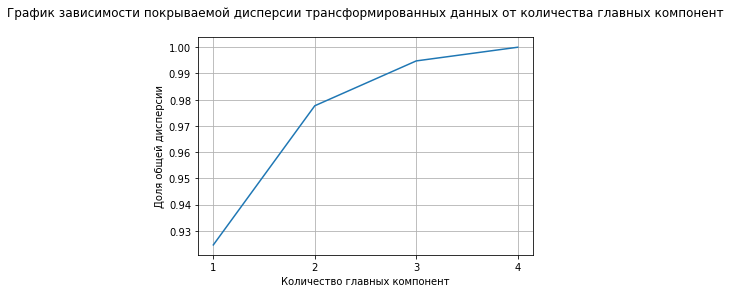

In [102]:
plt.plot(np.arange(1, len(lmbd) + 1, dtype='int64'), f_r)
plt.xticks(ticks=np.arange(1, len(lmbd) + 1, dtype='int64'))
plt.grid()
plt.xlabel('Количество главных компонент')
plt.ylabel('Доля общей дисперсии')
plt.title('График зависимости покрываемой дисперсии трансформированных данных от количества главных компонент\n')
plt.show()

7. выбираем наименьший $r$ так, чтобы $f(r) \geq \alpha$;

In [73]:
r = np.where(f_r >= coef_a)[0][0] + 1

8. выбираем $r$ первых векторов $U = (u_1 u_2 \ldots u_r)$;

In [75]:
Ur = U[:, :r]
Ur

array([[ 0.36138659, -0.65658877],
       [-0.08452251, -0.73016143],
       [ 0.85667061,  0.17337266],
       [ 0.3582892 ,  0.07548102]])

9. уменьшаем признаковое пространство: $A = \{ a_i \: | \: a_i = U_r^T x_i, \: для \: i = 1, \ldots, n \} $

In [86]:
# A = np.zeros((x.shape[0], r))
# for i in range(x.shape[0]):
#     A[i] = np.dot(Ur.T, x[i])

# A[:5]

array([[ 2.81823951, -5.64634982],
       [ 2.78822345, -5.14995135],
       [ 2.61337456, -5.18200315],
       [ 2.75702228, -5.0086536 ],
       [ 2.7736486 , -5.65370709]])

In [89]:
A = np.dot(x, Ur)
A[:5]

array([[ 2.81823951, -5.64634982],
       [ 2.78822345, -5.14995135],
       [ 2.61337456, -5.18200315],
       [ 2.75702228, -5.0086536 ],
       [ 2.7736486 , -5.65370709]])

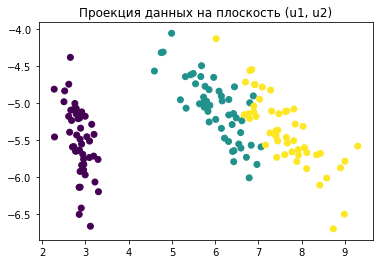

In [105]:
plt.scatter(A[:,0], A[:,1], c=y)
plt.title('Проекция данных на плоскость (u1, u2)')
plt.show()

Сравните реузльтаты с методом PCA из библиотеки sklearn.decomposition.

In [122]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
XPCAreduced = pca.fit_transform(x)
XPCAreduced

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

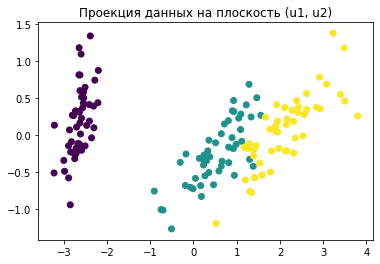

In [112]:
plt.scatter(XPCAreduced[:,0], XPCAreduced[:,1], c=y)
plt.title('Проекция данных на плоскость (u1, u2)')
plt.show()

In [119]:
print(f'eigenvectors(count = {r}):\n{Ur}\n\neigenvectors pca from sklearn:\n{pca.components_.T}')

eigenvectors(count = 2):
[[ 0.36138659 -0.65658877]
 [-0.08452251 -0.73016143]
 [ 0.85667061  0.17337266]
 [ 0.3582892   0.07548102]]

eigenvectors pca from sklearn:
[[ 0.36138659  0.65658877]
 [-0.08452251  0.73016143]
 [ 0.85667061 -0.17337266]
 [ 0.3582892  -0.07548102]]


### Алгоритм PCA в одном методе:

In [126]:
def pca_(D: np.array, coef_a: float) -> np.array:
    m = np.mean(D, axis=0)
    Z = D - m
    K = np.cov(Z.T)
    lmbd, U = np.linalg.eig(K)
    f_r = np.array(list(
        map(
            lambda r: np.sum(lmbd[: r]) /
                      np.sum(lmbd), 
            np.arange(1, len(lmbd) + 1)
            )
        ))
    r = np.where(f_r >= coef_a)[0][0] + 1
    Ur = U[:, :r]
    A = np.dot(x, Ur)
    return A

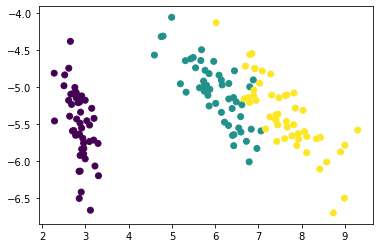

In [130]:
plt.scatter(pca_(x, coef_a)[:, 0], pca_(x, coef_a)[:, 1], c=y)

# Интерпретация компонент
## Корреляция с исходными признаками
Главные компоненты являются линейными кобинациями исходных признаков. В этой связи необходимо оценить связь каждой компоненты с исходными признаками.

Рассчет взаимосвязи будем проводить с помощью корреляции Пирсона:

\begin{equation}
r_{jk} = \frac{\sum_{i=1}^n (x_{ij} - \bar{x}_j) (x_{ik}' - \bar{x}_k')}{\sqrt{\sum_{i=1}^n (x_{ij} - \bar{x}_j)^2 \sum_{i=1}^n (x_{ik}' - \bar{x}_k')^2}}
\end{equation}

где
$\bar{x}_j$ - среднее значение $j$-го признака,
$\bar{x}_k'$ - среднее значение проекции на $k$-ю главную компоненту,
$n$ - количество объектов.

Отметим, что корреляция Пирсона изменяется от $-1$ до $+1$. Она равна $0$ в случае, когда величины независимы, и $\pm 1$, если они линейно зависимы.

Определите по коэффициентам корреляции, какие признаки в какую компоненту вошли.

In [136]:
print(f'x sample\n{x[:5]}\n\nA sample\n{A[:5]}')

x sample
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

A sample
[[ 2.81823951 -5.64634982]
 [ 2.78822345 -5.14995135]
 [ 2.61337456 -5.18200315]
 [ 2.75702228 -5.0086536 ]
 [ 2.7736486  -5.65370709]]


In [139]:
A_centered = A - np.mean(A, axis=0) 
A_centered

array([[-2.68412563, -0.31939725],
       [-2.71414169,  0.17700123],
       [-2.88899057,  0.14494943],
       [-2.74534286,  0.31829898],
       [-2.72871654, -0.32675451],
       [-2.28085963, -0.74133045],
       [-2.82053775,  0.08946138],
       [-2.62614497, -0.16338496],
       [-2.88638273,  0.57831175],
       [-2.6727558 ,  0.11377425],
       [-2.50694709, -0.6450689 ],
       [-2.61275523, -0.01472994],
       [-2.78610927,  0.235112  ],
       [-3.22380374,  0.51139459],
       [-2.64475039, -1.17876464],
       [-2.38603903, -1.33806233],
       [-2.62352788, -0.81067951],
       [-2.64829671, -0.31184914],
       [-2.19982032, -0.87283904],
       [-2.5879864 , -0.51356031],
       [-2.31025622, -0.39134594],
       [-2.54370523, -0.43299606],
       [-3.21593942, -0.13346807],
       [-2.30273318, -0.09870885],
       [-2.35575405,  0.03728186],
       [-2.50666891,  0.14601688],
       [-2.46882007, -0.13095149],
       [-2.56231991, -0.36771886],
       [-2.63953472,

In [142]:
corr = np.dot(Z.T, A_centered)
corr

array([[227.67644905, -23.74089834],
       [-53.24986124, -26.4011344 ],
       [539.70934728,   6.26879859],
       [225.72506561,   2.7292383 ]])

In [155]:
a = np.sum(Z ** 2, axis=0)
b = np.sum(A_centered ** 2, axis=0)
a, b

(array([102.16833333,  28.30693333, 464.3254    ,  86.56993333]),
 array([630.0080142 ,  36.15794144]))

In [173]:
aa = np.column_stack((a, a))
aa

array([[102.16833333, 102.16833333],
       [ 28.30693333,  28.30693333],
       [464.3254    , 464.3254    ],
       [ 86.56993333,  86.56993333]])

In [174]:
aa * b

array([[ 64366.86879737,   3694.19661383],
       [ 17833.5948574 ,   1023.52043785],
       [292528.72319625,  16789.05062294],
       [ 54539.75178869,   3130.19058005]])

In [176]:
np.sqrt(aa * b)

array([[253.7062648 ,  60.77990304],
       [133.54248334,  31.99250596],
       [540.85924527, 129.57256894],
       [233.53747406,  55.94810613]])

In [177]:
corr

array([[227.67644905, -23.74089834],
       [-53.24986124, -26.4011344 ],
       [539.70934728,   6.26879859],
       [225.72506561,   2.7292383 ]])

### Ответ

In [178]:
corr / np.sqrt(aa * b)

array([[ 0.89740176, -0.39060441],
       [-0.39874847, -0.82522871],
       [ 0.99787394,  0.0483806 ],
       [ 0.96654752,  0.0487816 ]])